In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [78]:
food = pd.read_csv('./Data/seogyodong+korean-ratio+franchise+hint.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0


### 힌트를 통해 어떠한 데이터를 구하면 될지 보기

In [79]:
zero=food[food['clustering']==0]
one=food[food['clustering']==1]

In [80]:
zero['서비스_업종_코드_명'].unique()

array(['한식음식점', '중식음식점', '일식음식점', '패스트푸드점', '분식전문점', '커피-음료', '양식음식점',
       '치킨전문점', '호프-간이주점', '제과점'], dtype=object)

In [81]:
a=list(zero['점포수'].unique())
a.sort()
a

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 38]

In [82]:
a=list(one['점포수'].unique())
a.sort()
a

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [83]:
one['기준_분기_코드'].unique()

array([4, 2, 1, 3])

In [84]:
one['기준_년_코드'].unique()

array([2021, 2015, 2014, 2016, 2017, 2018, 2019, 2020])

In [85]:
zero['상권_코드_명'].unique()

array(['동교로17길', '동교로19길', '신촌로12길', '양화로11길', '와우산로29가길', '와우산로29길',
       '월드컵로10길', '월드컵로16길', '월드컵로8길'], dtype=object)

In [86]:
food['상권_코드_명'].unique()

array(['동교로17길', '동교로19길', '신촌로12길', '양화로11길', '와우산로29가길', '와우산로29길',
       '월드컵로10길', '월드컵로16길', '월드컵로8길'], dtype=object)

In [87]:
food['서비스_업종_코드_명'].unique()

array(['한식음식점', '중식음식점', '일식음식점', '패스트푸드점', '분식전문점', '커피-음료', '양식음식점',
       '치킨전문점', '호프-간이주점', '제과점'], dtype=object)

In [88]:
zero['서비스_업종_코드_명'].unique()

array(['한식음식점', '중식음식점', '일식음식점', '패스트푸드점', '분식전문점', '커피-음료', '양식음식점',
       '치킨전문점', '호프-간이주점', '제과점'], dtype=object)

### 약간의 특징을 발견했다. 25이상인 점포수면 힌트의 1번에 해당 되는 경우가 많다.

In [89]:
food['hint']=[1 if i >= 25 else 0 for i in food['점포수']]
food['hint2']=[1 if i >= 1 else 0 for i in food['프랜차이즈']]

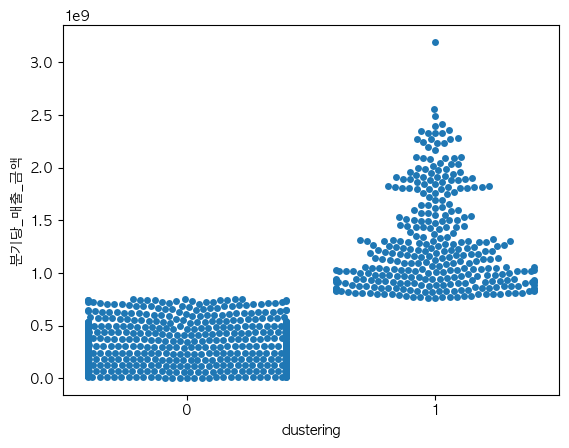

In [90]:
sns.swarmplot(
    x='clustering',
    y='분기당_매출_금액',
    data=food
)

plt.show()

In [91]:
food['clustering'].value_counts()

0    1315
1     328
Name: clustering, dtype: int64

In [92]:
feature = food[['점포수','한식음식점여부','hint2','hint']]
target = food['분기당_매출_금액']

In [93]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6554907643896026
test :  0.5796573123174802
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6239332081168449
test :  0.6080672866219559
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6239187405379815
test :  0.6081372119044066
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6239332081168445
test :  0.6080672868538267
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7030149004506819
test :  0.6134007551061499
--------------------------------------------------


In [94]:
from module.machinelearning import ridge , lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

food['점포수_스케일']=scaler.fit_transform(food['점포수'].to_numpy().reshape(-1,1))

feature = food[['점포수_스케일','한식음식점여부','hint2','hint']]
target = food['분기당_매출_금액']

basic(feature,target)
ridge(feature,target)
lasso(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6899158263766191
test :  0.605638113182212
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6385883207355121
test :  0.6334197410478285
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6385771204501124
test :  0.6335769849892946
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.638588320735512
test :  0.6334197415096293
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7283420255669399
test :  0.6352930994320005
--------------------------------------------------
-------------------------------------------------- alpha :  0.0001 --------------------------------------------------
train : 0.6422081676342619
val : 0.636673443825363
test : 0.5442255217868814

----

### 안된다 새로운 데이터가 필요하다.

In [95]:
food['점포수**2'] = food['점포수']**2
food['점포수**3'] = food['점포수']**3
food['점포수**4'] = food['점포수']**4
food['점포수**5'] = food['점포수']**5

In [97]:
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering,hint,hint2,점포수_스케일,점포수**2,점포수**3,점포수**4,점포수**5
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0,0,1,0.722856,196,2744,38416,537824
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0,0,0,-1.034826,1,1,1,1
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0,0,0,-0.764414,9,27,81,243
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0,0,0,-0.764414,9,27,81,243
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0,0,0,-0.358795,36,216,1296,7776


3,4 가 베스트


In [114]:
feature = food[['점포수','한식음식점여부','프랜차이즈','점포수**4','점포수**3','점포수**2',
                '점포수**5']]
target = food['분기당_매출_금액']

basic(feature,target)

food['점포수_스케일']=scaler.fit_transform(food['점포수'].to_numpy().reshape(-1,1))

feature = food[['점포수_스케일','한식음식점여부','프랜차이즈','점포수**4','점포수**3','점포수**5','점포수**2']]
target = food['분기당_매출_금액']

ridge(feature,target)
lasso(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6903344080791507
test :  0.6196341670783567
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6614701963072009
test :  0.6392578832787114
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6614643146695245
test :  0.6392835319678316
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6588149769104896
test :  0.6393901124858019
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7373509878435665
test :  0.64468700775385
--------------------------------------------------
-------------------------------------------------- alpha :  0.0001 --------------------------------------------------
train : 0.640967804682588
val : 0.6315746870210723
test : 0.6490211456674557

----

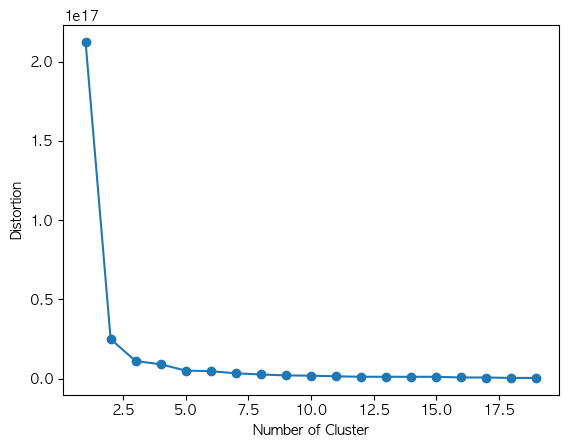

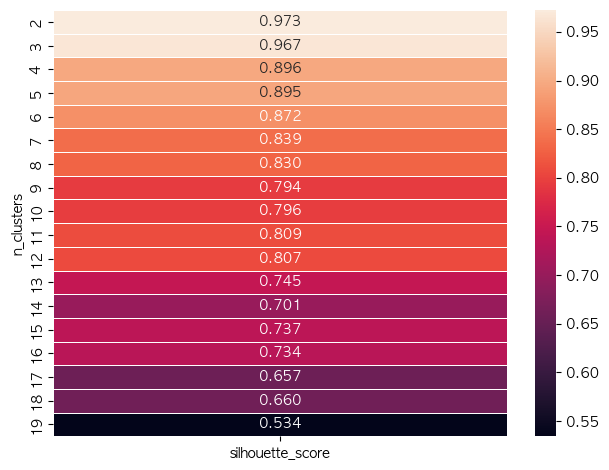

In [115]:
import module.clustering as clu
data = food[['점포수','점포수**4','점포수**3','점포수**5','점포수**2']]



clu.visualize_elbowmethod(data,n=20)
clu.visualize_silhouette_layer(data,n=20)

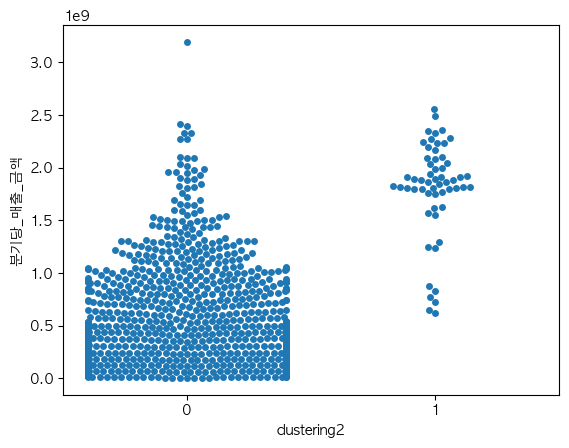

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
food['clustering2']=kmeans.labels_

sns.swarmplot(
    x='clustering2',
    y='분기당_매출_금액',
    data=food
)

plt.show()

In [120]:
feature = food[['점포수','한식음식점여부','프랜차이즈','clustering2']]
target = food['분기당_매출_금액']

basic(feature,target)

food['점포수_스케일']=scaler.fit_transform(food['점포수'].to_numpy().reshape(-1,1))

feature = food[['점포수_스케일','한식음식점여부','프랜차이즈','점포수**4','점포수**3','clustering2']]
target = food['분기당_매출_금액']

ridge(feature,target)
lasso(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6772566342552366
test :  0.6185383607097825
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6318180427403575
test :  0.6284524737946675
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6317982837310826
test :  0.6285631605567944
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6318180427403572
test :  0.6284524739681013
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7212653040438496
test :  0.6445429590202258
--------------------------------------------------
-------------------------------------------------- alpha :  0.0001 --------------------------------------------------
train : 0.6564112307916481
val : 0.6437930204697558
test : 0.5821403281728903

-